# 5 - Data Visualization and Profiling

## Data Quality

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
sys.path.append("../../Optimus")

In [24]:
from optimus import Optimus 
op = Optimus("pandas")

In [25]:
df = op.load.file("foo.csv")

In [26]:
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [27]:
df.cols.quality() 

{'name': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'profiler_dtype': {'dtype': 'str', 'categorical': True}},
 'job': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'profiler_dtype': {'dtype': 'str', 'categorical': True}},
 'id': {'match': 4,
  'missing': 0,
  'mismatch': 0,
  'profiler_dtype': {'dtype': 'int', 'categorical': True}}}

In [28]:
df.meta

{'file_name': ['foo.csv'], 'name': 'foo.csv'}

In [29]:
df = df.cols.set_dtype("salary", "int")
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [30]:
df = df.cols.set_dtype({"salary": "int", "age": "str"})  
df

name 1 (object) not nullable,job 2 (object) not nullable,id 3 (int64) not nullable
optimus,Leader,1
optimus,Espionage,2
bumblebee,1,3
bumblebee,3,40


In [31]:
df = op.create.dataframe({"numbers": [1, 2, None, 4]}) 

In [32]:
df.mask.missing("numbers").print() 

  numbers
   (bool)
---------
        0
        0
        1
        0


In [33]:
df = op.create.dataframe({"numbers": [1, 2, "Hello", 4, "World"]}) 
df

numbers 1 (object) not nullable
1
2
Hello
4
World


In [34]:
df.mask.match("numbers", "int").print()

  numbers
   (bool)
---------
        1
        1
        0
        1
        0


In [35]:
df.rows.select(df.mask.match("numbers", "int")).print() 

   numbers
  (object)
----------
         1
         2
         4


In [36]:
df.rows.drop(df.mask.match("numbers", "int")).print() 

numbers
(object)
----------
Hello
World


In [37]:
df.cols.set("numbers", value=0, where=df.mask.mismatch("numbers", "int")).print() 

   numbers
  (object)
----------
         1
         2
         0
         4
         0


In [60]:
df.profile()

{'columns': {'numbers': {'stats': {'match': 3,
    'missing': 0,
    'mismatch': 2,
    'profiler_dtype': {'dtype': 'int', 'categorical': True},
    'frequency': [{'value': 1, 'count': 1},
     {'value': 2, 'count': 1},
     {'value': 'Hello', 'count': 1},
     {'value': 4, 'count': 1},
     {'value': 'World', 'count': 1}],
    'count_uniques': 5},
   'dtype': 'object'}},
 'name': None,
 'file_name': None,
 'summary': {'cols_count': 1,
  'rows_count': 5,
  'dtypes_list': ['object'],
  'total_count_dtypes': 1,
  'missing_count': 0,
  'p_missing': 0.0}}

In [61]:
df.cols.dtypes("numbers")
df.mask.mismatch("numbers")

numbers 1 (bool) not nullable
False
False
True
False
True


In [62]:
df["numbers"].profile.dtypes()

'int'

In [63]:
df.cols.set("numbers", value=0, where=df.mask.mismatch("numbers")) 

numbers 1 (object) not nullable
1
2
0
4
0


## Exploratory Data Analysis

In [64]:
from optimus import Optimus  
op = Optimus("pandas") 
df = op.load.file("foo.csv") 

In [65]:
df.cols.min("id") 

{'min': {'id': 1}}

In [66]:
df.cols.max("id") 

{'max': {'id': 40}}

In [75]:
df.cols.mode("id")

{'id': {0: 1.0, 1: 2.0, 2: 3.0, 3: 40.0}}

In [77]:
df.cols.median("id") 

2.5

In [78]:
df.cols.median("id") 

2.5

In [79]:
df.cols.mean("id") 

11.5

In [80]:
df.cols.std("id") 

19.017535767461215

In [81]:
df.cols.var("id") 

361.6666666666667

In [82]:
df.data["id"].skew() 

1.988947740397821

In [83]:
df.cols.kurtosis("id") 

3.9631931024230695

In [86]:
df.cols.count_zeros("id") 

0

In [87]:
df.cols.count_nulls("id") 

AttributeError: 'Cols' object has no attribute 'count_nulls'

In [88]:
df.cols.count_na("id") 

0

In [89]:
df.cols.count_uniques("id") 

4

## Data Profiling

In [90]:
df.cols.hist("id",5) 

{'hist': {'id': [{'lower': 1.0, 'upper': 10.75, 'count': 3},
   {'lower': 10.75, 'upper': 20.5, 'count': 0},
   {'lower': 20.5, 'upper': 30.25, 'count': 0},
   {'lower': 30.25, 'upper': 40.0, 'count': 1}]}}

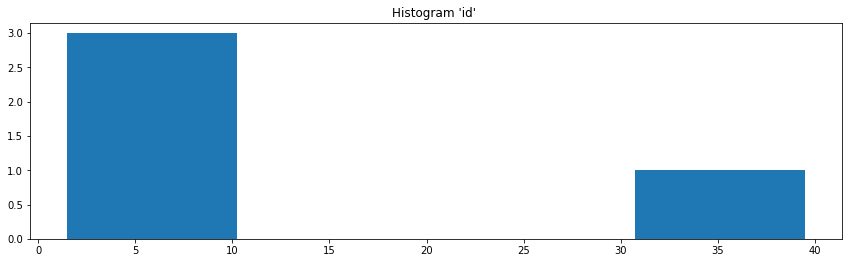

In [91]:
df.plot.hist("id",5)

In [92]:
df.cols.frequency("*", 5) 

{'frequency': {'name': {'values': [{'value': 'optimus', 'count': 2},
    {'value': 'bumblebee', 'count': 2}]},
  'job': {'values': [{'value': 'Espionage', 'count': 1},
    {'value': '3', 'count': 1},
    {'value': '1', 'count': 1},
    {'value': 'Leader', 'count': 1}]},
  'id': {'values': [{'value': 40, 'count': 1},
    {'value': 1, 'count': 1},
    {'value': 2, 'count': 1},
    {'value': 3, 'count': 1}]}}}

In [116]:
df.cols.frequency(tidy=True)

{'name': {'values': [{'value': 'optimus', 'count': 2},
   {'value': 'bumblebee', 'count': 2}]},
 'job': {'values': [{'value': 'Espionage', 'count': 1},
   {'value': '3', 'count': 1},
   {'value': '1', 'count': 1},
   {'value': 'Leader', 'count': 1}]},
 'id': {'values': [{'value': 40, 'count': 1},
   {'value': 1, 'count': 1},
   {'value': 2, 'count': 1},
   {'value': 3, 'count': 1}]}}

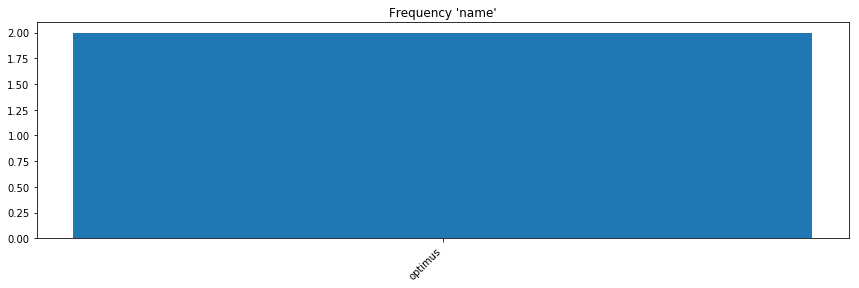

In [124]:
df.plot.frequency("name", 40) 

In [141]:
df.cols.scatter("id") 

In [140]:
df.plot.scatter("id") 

data None
column_data None


TypeError: 'NoneType' object is not subscriptable

<Figure size 864x360 with 0 Axes>

In [132]:
df.cols.boxplot("id") 

{'id': {'mean': 11.5,
  'median': 2.5,
  'q1': 1.75,
  'q3': 12.25,
  'whisker_low': -14.0,
  'whisker_high': 28.0,
  'fliers': [{'id': 40}],
  'label': 'id'}}

In [135]:
df.plot.box("id") 

ValueError: 'columns' must be 'str' or 'list', received 'None'. Maybe the columns selected do not match a specified datatype filter.

In [127]:
df.plot.correlation("*") 

TypeError: 'NoneType' object is not subscriptable

In [128]:
df.profile(bins=5)

{'columns': {'name': {'stats': {'match': 4,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'str', 'categorical': True},
    'frequency': [{'value': 'optimus', 'count': 2},
     {'value': 'bumblebee', 'count': 2}],
    'count_uniques': 2},
   'dtype': 'object'},
  'job': {'stats': {'match': 4,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'str', 'categorical': True},
    'frequency': [{'value': 'Espionage', 'count': 1},
     {'value': '3', 'count': 1},
     {'value': '1', 'count': 1},
     {'value': 'Leader', 'count': 1}],
    'count_uniques': 4},
   'dtype': 'object'},
  'id': {'stats': {'match': 4,
    'missing': 0,
    'mismatch': 0,
    'profiler_dtype': {'dtype': 'int', 'categorical': True},
    'frequency': [{'value': 40, 'count': 1},
     {'value': 1, 'count': 1},
     {'value': 2, 'count': 1},
     {'value': 3, 'count': 1}],
    'count_uniques': 4},
   'dtype': 'int64'}},
 'name': 'foo.csv',
 'file_name': ['foo.csv'],
 'summary': {'co

In [129]:
df.profile.summary()

{'cols_count': 3,
 'rows_count': 4,
 'dtypes_list': ['int64', 'object'],
 'total_count_dtypes': 2,
 'missing_count': 0,
 'p_missing': 0.0}

In [130]:
df.profile.columns()

[{'stats': {'match': 4,
   'missing': 0,
   'mismatch': 0,
   'profiler_dtype': {'dtype': 'str', 'categorical': True},
   'frequency': [{'value': 'optimus', 'count': 2},
    {'value': 'bumblebee', 'count': 2}],
   'count_uniques': 2},
  'dtype': 'object'},
 {'stats': {'match': 4,
   'missing': 0,
   'mismatch': 0,
   'profiler_dtype': {'dtype': 'str', 'categorical': True},
   'frequency': [{'value': 'Espionage', 'count': 1},
    {'value': '3', 'count': 1},
    {'value': '1', 'count': 1},
    {'value': 'Leader', 'count': 1}],
   'count_uniques': 4},
  'dtype': 'object'},
 {'stats': {'match': 4,
   'missing': 0,
   'mismatch': 0,
   'profiler_dtype': {'dtype': 'int', 'categorical': True},
   'frequency': [{'value': 40, 'count': 1},
    {'value': 1, 'count': 1},
    {'value': 2, 'count': 1},
    {'value': 3, 'count': 1}],
   'count_uniques': 4},
  'dtype': 'int64'}]

In [131]:
df.visual_profile() 

AttributeError: 'PandasDataFrame' object has no attribute 'visual_profile'

In [ ]:
from optimus.helpers.constants import Actions
Actions.list()